In [1]:
import pandas as pd
import os
import stylia
import matplotlib.pyplot as plt

import stylia as st
from stylia import ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH, NamedColorMaps, NamedColors, ContinuousColorMap

data_dir = "../data/"

def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir, "all_molecules_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)

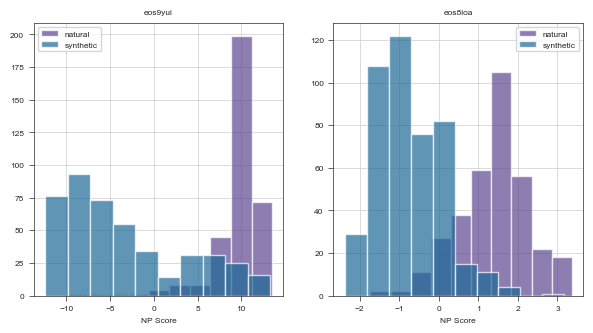

In [2]:
df = load_data("eos9yui") #NP likeness
df_ = load_data("eos8ioa") #NP score
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(df[df["category"]=="natural"]["score"], alpha = 0.7, label = "natural")
ax.hist(df[df["category"]=="synthetic"]["score"], alpha = 0.7, label = "synthetic")
ax.set_title("eos9yui")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df_[df_["category"]=="natural"]["nplikeness"], alpha = 0.7, label = "natural")
ax.hist(df_[df_["category"]=="synthetic"]["nplikeness"], alpha = 0.7, label = "synthetic")
ax.set_title("eos8ioa")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()

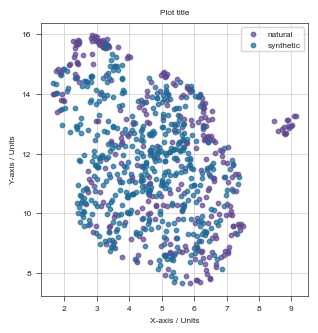

In [31]:
import umap
import numpy as np
df = load_data("eos24ur")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

umap_trn = umap.UMAP(n_neighbors=100)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural")
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic")
ax.legend()

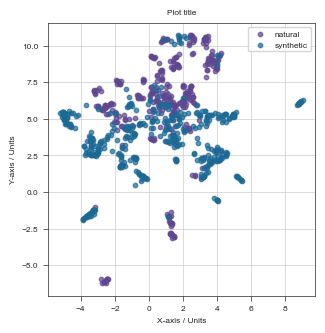

In [34]:
import umap
import numpy as np

df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

umap_trn = umap.UMAP(n_neighbors=10)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural")
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic")
ax.legend()

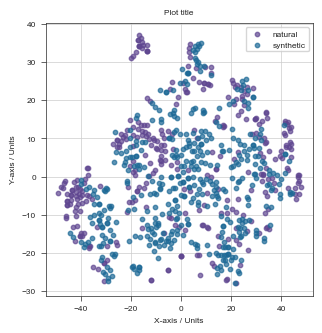

In [62]:
from sklearn.manifold import TSNE

df = load_data("eos24ur")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

# Apply t-SNE transformation
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
# Split array based on category
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index

tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural")
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic")
ax.legend()

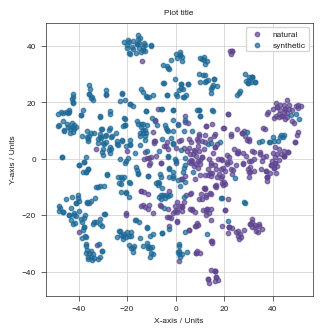

In [63]:
from sklearn.manifold import TSNE

df = load_data("eos2gw4")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

# Apply t-SNE transformation
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
# Split array based on category
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index

tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural")
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic")
ax.legend()

In [70]:
df  = load_data("eos7d58")
df.columns

Index(['file_name', 'inchikey', 'smiles', 'category', 'molecular_weight',
       'logP', 'hydrogen_bond_acceptors', 'hydrogen_bond_donors', 'Lipinski',
       'QED',
       ...
       'Caco2_Wang_drugbank_approved_percentile',
       'Clearance_Hepatocyte_AZ_drugbank_approved_percentile',
       'Clearance_Microsome_AZ_drugbank_approved_percentile',
       'Half_Life_Obach_drugbank_approved_percentile',
       'HydrationFreeEnergy_FreeSolv_drugbank_approved_percentile',
       'LD50_Zhu_drugbank_approved_percentile',
       'Lipophilicity_AstraZeneca_drugbank_approved_percentile',
       'PPBR_AZ_drugbank_approved_percentile',
       'Solubility_AqSolDB_drugbank_approved_percentile',
       'VDss_Lombardo_drugbank_approved_percentile'],
      dtype='object', length=102)

In [73]:
all_props = [
    "molecular_weight", "logP", "hydrogen_bond_acceptors", "hydrogen_bond_donors", "Lipinski", "QED",
    "stereo_centers", "tpsa", "AMES", "BBB_Martins", "Bioavailability_Ma", "CYP1A2_Veith",
    "CYP2C19_Veith", "CYP2C9_Substrate_CarbonMangels", "CYP2C9_Veith", "CYP2D6_Substrate_CarbonMangels",
    "CYP2D6_Veith", "CYP3A4_Substrate_CarbonMangels", "CYP3A4_Veith", "Carcinogens_Lagunin", "ClinTox",
    "DILI", "HIA_Hou", "NR-AR-LBD", "NR-AR", "NR-AhR", "NR-Aromatase", "NR-ER-LBD", "NR-ER", "NR-PPAR-gamma",
    "PAMPA_NCATS", "Pgp_Broccatelli", "SR-ARE", "SR-ATAD5", "SR-HSE", "SR-MMP", "SR-p53", "Skin_Reaction",
    "hERG", "Caco2_Wang", "Clearance_Hepatocyte_AZ", "Clearance_Microsome_AZ", "Half_Life_Obach",
    "HydrationFreeEnergy_FreeSolv", "LD50_Zhu", "Lipophilicity_AstraZeneca", "PPBR_AZ", "Solubility_AqSolDB",
    "VDss_Lombardo"
]

49
22


In [75]:
df

,file_name,inchikey,smiles,category,molecular_weight,logP,hydrogen_bond_acceptors,hydrogen_bond_donors,Lipinski,QED,...,Caco2_Wang_drugbank_approved_percentile,Clearance_Hepatocyte_AZ_drugbank_approved_percentile,Clearance_Microsome_AZ_drugbank_approved_percentile,Half_Life_Obach_drugbank_approved_percentile,HydrationFreeEnergy_FreeSolv_drugbank_approved_percentile,LD50_Zhu_drugbank_approved_percentile,Lipophilicity_AstraZeneca_drugbank_approved_percentile,PPBR_AZ_drugbank_approved_percentile,Solubility_AqSolDB_drugbank_approved_percentile,VDss_Lombardo_drugbank_approved_percentile
0,J08_23,DWCXXICTUDDKTB-ZYHUDNBSSA-N,CC1=CC(=O)[C@]2(O[C@@H]2C(=O)CC(C)C)C(=O)N1,natural,237.255,0.34190,4.0,1.0,4.0,0.567060,...,84.257464,38.193098,35.401318,4.032571,31.678945,51.492827,31.795269,39.240016,73.749515,36.331912
1,MCSJ29_0001,ICCCTINORQADKA-UHFFFAOYSA-N,CC(c1ccc(O)c(O)c1)c1cc(=O)c2c(O)cccc2o1,natural,298.294,3.06160,5.0,3.0,4.0,0.632453,...,40.791004,80.341218,46.878635,27.530050,38.929818,39.395114,77.704537,75.843350,35.246219,32.687088
2,J01_19,JXGIYKRRPGCLFV-JOCHJYFZSA-N,CC(C)(C)NC(=O)[C@@H](c1cccnc1)N(C(=O)c1ccco1)c...,natural,433.552,5.27490,4.0,1.0,3.0,0.594325,...,63.590539,81.271811,91.934858,96.665374,64.055836,73.555642,93.989919,97.324544,7.599845,81.737107
3,J02_19,IEPKWJCBNGNVDF-WQIPHUEGSA-N,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O[C@@H]2O[C@H]...,natural,640.547,-1.67850,17.0,10.0,1.0,0.129111,...,4.187670,32.880962,74.137263,88.134936,8.336565,70.027142,38.348197,61.574254,26.832105,92.749128
4,J18_21,DWCXXICTUDDKTB-JQWIXIFHSA-N,CC1=CC(=O)[C@@]2(O[C@H]2C(=O)CC(C)C)C(=O)N1,natural,237.255,0.34190,4.0,1.0,4.0,0.567060,...,86.622722,43.776658,37.223730,3.101978,32.183017,52.617294,32.997286,37.960450,72.625048,34.548275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Lopinavir,CSKDFZIMJXRJGH-DEPYFDJDSA-N,O=C(NN1C(=O)[C@H]2[C@@H]3C=C[C@@H]([C@@H]4C[C@...,synthetic,376.334,2.40330,3.0,1.0,4.0,0.636822,...,58.006979,25.126018,2.365258,71.384257,76.269872,94.959287,74.447460,89.298178,15.238465,4.614192
784,J11_22,IWUCXVSUMQZMFG-UOPPWDSKSA-N,NC(=O)c1ncn([C@H]2O[C@@H](CO)[C@H](O)[C@H]2O)n1,synthetic,244.207,-3.01150,8.0,4.0,4.0,0.442842,...,20.007755,50.562233,19.464909,68.243505,0.891819,15.936409,10.701822,4.652966,90.383870,64.947654
785,MCSJ21_0009,RXZBWNGUTUDXCB-MEBBXXQBSA-N,Cc1cn([C@@H]2CN(C(=O)CCC(=O)O)CC[C@@]2(C)O)c(=...,synthetic,339.348,-0.76578,6.0,3.0,4.0,0.659932,...,18.456766,3.877472,1.318340,0.891819,3.683598,28.809616,0.271423,11.748740,79.371850,67.351687
786,SV_J4_0002,LSQZJLSUYDQPKJ-RMIALFOJSA-N,CC1(C)S[C@H]2[C@@H](NC(=O)[C@@H](N)c3ccc(O)cc3...,synthetic,365.411,0.02370,6.0,4.0,4.0,0.553032,...,5.622334,22.179139,38.193098,35.633967,14.346646,17.138426,12.756883,30.166731,70.492439,39.433889


(array([12., 13., 35., 44., 44., 46., 63., 82., 63., 46.]),
 array([ 5.07948817, 14.54439705, 24.00930593, 33.47421481, 42.93912369,
        52.40403257, 61.86894145, 71.33385033, 80.79875921, 90.26366809,
        99.72857697]),
 <BarContainer object of 10 artists>)

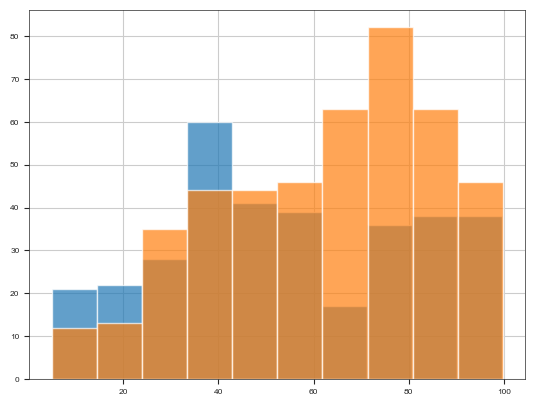

In [78]:
import matplotlib.pyplot as plt

plt.hist(df[df["category"]=="natural"]["molecular_weight_drugbank_approved_percentile"], alpha = 0.7)
plt.hist(df[df["category"]=="synthetic"]["molecular_weight_drugbank_approved_percentile"], alpha = 0.7)